In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("flavors_of_cacao.csv")

# Remove newline characters and extra spaces from column names
df.columns = df.columns.str.replace("\n", " ", regex=False).str.strip()

print(df.columns.tolist())
df.head()

['Company\xa0 (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Cleaned columns:
 ['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']
Missing Bean Type: 1
Number of tuples: 1793
Unique companies: 416
Reviews in 2013: 184


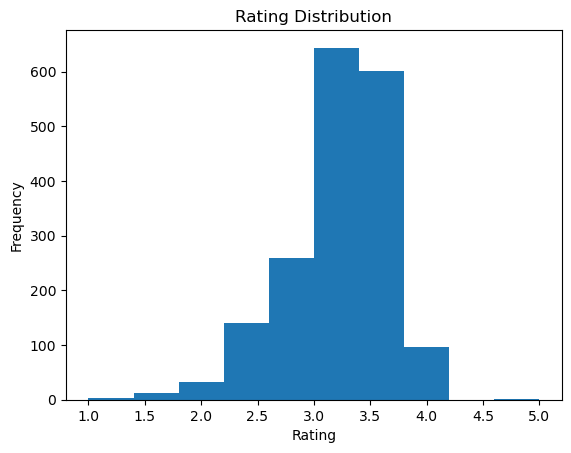

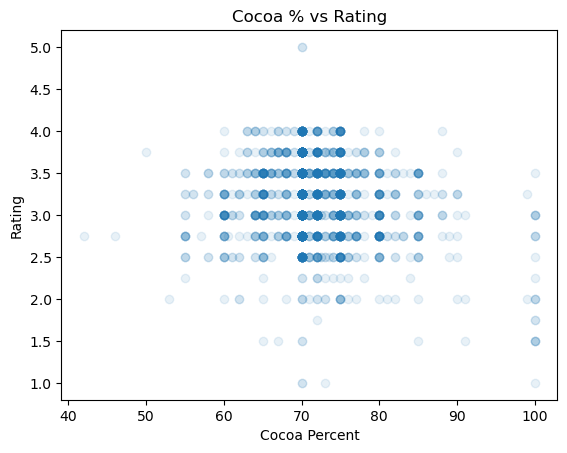

NormalizedRating (first 5):
0    0.6875
1    0.4375
2    0.5000
3    0.6250
4    0.6250
Name: NormalizedRating, dtype: float64
Top 10 companies by average rating:
Company (Maker-if known)
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Obolo                                   3.750000
Chocola'te                              3.750000
Timo A. Meyer                           3.750000
Name: Rating, dtype: float64
Encoded dataframe shape: (1793, 484)


,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Rating,Bean Type,Broad Bean Origin,NormalizedRating,Company (Maker-if known)_A. Morin,Company (Maker-if known)_AMMA,...,Company Location_Spain,Company Location_St. Lucia,Company Location_Suriname,Company Location_Sweden,Company Location_Switzerland,Company Location_U.K.,Company Location_U.S.A.,Company Location_Venezuela,Company Location_Vietnam,Company Location_Wales
0,Agua Grande,1876,2016,63.0,3.75,,Sao Tome,0.6875,True,False,...,False,False,False,False,False,False,False,False,False,False
1,Kpime,1676,2015,70.0,2.75,,Togo,0.4375,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Atsane,1676,2015,70.0,3.00,,Togo,0.5000,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Akata,1680,2015,70.0,3.50,,Togo,0.6250,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Quilla,1704,2015,70.0,3.50,,Peru,0.6250,True,False,...,False,False,False,False,False,False,False,False,False,False


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# STEP 1 & 2 — Read dataset
# -------------------------
df = pd.read_csv("flavors_of_cacao.csv")  # make sure this matches your file name exactly

# Clean column names (fix newline + hidden spaces like \xa0 + extra spaces)
df.columns = (
    df.columns
    .astype(str)
    .str.replace("\n", " ", regex=False)
    .str.replace("\xa0", " ", regex=False)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# (Optional) See cleaned column names
print("Cleaned columns:\n", df.columns.tolist())

# Assign correct column names (after cleaning)
company_col = "Company (Maker-if known)"
review_col  = "Review Date"
cocoa_col   = "Cocoa Percent"
rating_col  = "Rating"
bean_col    = "Bean Type"

# 4) Missing values in Bean Type (BEFORE dropping)
print("Missing Bean Type:", df[bean_col].isna().sum())

# Remove missing values (as the instructions say)
df = df.dropna()

# -------------------------
# STEP 3 — Exploring dataset
# -------------------------

# 1) Count of tuples
print("Number of tuples:", len(df))

# 2) Unique company names
print("Unique companies:", df[company_col].nunique())

# 3) Reviews in 2013
print("Reviews in 2013:", (df[review_col] == 2013).sum())

# -------------------------
# STEP 4 — Histogram of Ratings
# -------------------------
plt.hist(df[rating_col], bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Convert Cocoa Percent to numeric (remove % then float)
df[cocoa_col] = (
    df[cocoa_col]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)

# -------------------------
# STEP 5 — Scatter plot Cocoa % vs Rating
# -------------------------
plt.scatter(df[cocoa_col], df[rating_col], alpha=0.1)
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.title("Cocoa % vs Rating")
plt.show()

# -------------------------
# STEP 6 — Normalization of Rating
# -------------------------
df["NormalizedRating"] = (df[rating_col] - df[rating_col].min()) / (df[rating_col].max() - df[rating_col].min())
print("NormalizedRating (first 5):")
print(df["NormalizedRating"].head())

# -------------------------
# STEP 7 (Optional) — Average rating per company
# -------------------------
avg_scores = df.groupby(company_col)[rating_col].mean().sort_values(ascending=False)
print("Top 10 companies by average rating:")
print(avg_scores.head(10))


# -------------------------
# STEP 8 — Encoding
# -------------------------

# One-hot encode Company and Company Location
encoded_df = pd.get_dummies(df, columns=[company_col, "Company Location"])

print("Encoded dataframe shape:", encoded_df.shape)
encoded_df.head()